A sentiment analysis carried out on the reviews left by hotel customers on hotels.ng to better advise hotel managements on how to improve their hospitality services for upward profit mobility.

                        WEB-SCRAPPING
                        
Webscrapping of the hotels.ng site was performed with the Octoparse tool, a very powerful web-scrapping tool that scrappes data in a structured format.

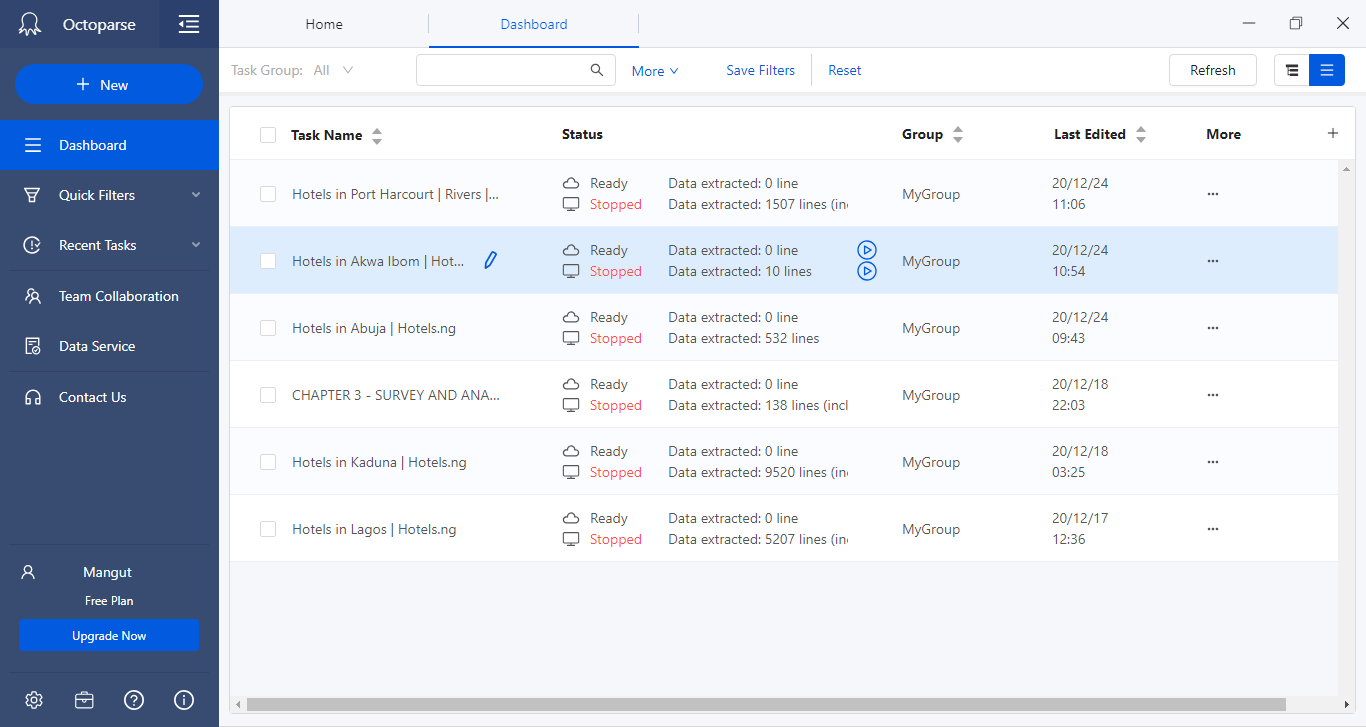

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# using pandas to read the csv files
df1 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Abuja%20Hotels.csv")
df2 = pd.read_csv('https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Lagos%20Hotels.csv')
df3 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Kaduna%20Hotels.csv")

Here we used the pandas .read_csv() function to read each of the files for the diffrent cities, Abuja, Lagos and Kaduna

In [3]:
# Renaming the 'Title' column as 'Hotel_Title'
df1 = df1.rename(columns = {'Title':'Hotel_Title','Review':'Review_Text'}, inplace = False)

We noticed that the table format/headings for the cities were not the same all through so we renamed them, the ones for Abuja specifically

In [4]:
#Dropping some columns that are irrelevant to the analysis
df2.drop('Number', axis = 1, inplace = True)
df2.drop('Like', axis = 1, inplace = True)
df3.drop('Number_of_Reviews', axis = 1, inplace = True)

There were columns in two of the three files we considered as irrelevant to our work and so we dropped them

In [5]:
df1['State'] = 'Abuja'
df2['State'] = 'Lagos'
df3['State'] = 'Kaduna'

A separate 'State' column was created for each city to indicate the state that each city is in

In [6]:
#combine all files in the list
combined_csv = pd.concat([df1,df2,df3])

Here the dataframes for the three cities were combined

In [7]:
combined_csv.head()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....","₦13,000\n ...",7.4 Very Good,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,"₦5,000\n ...",7.3 Very Good,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...","₦5,000\n ...",NaN,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,"₦8,400\n ...",6.8 Very Good,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,"₦9,000\n ...",7.4 Very Good,Abuja


This was so we could see that the concatenation worked 

In [8]:
# getting an overview of the columns of the dataset
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15259 entries, 0 to 9519
Data columns (total 9 columns):
Hotel_Title    15259 non-null object
Title_URL      15259 non-null object
Address        15259 non-null object
Address_URL    15259 non-null object
City           10897 non-null object
Review_Text    711 non-null object
Price          4337 non-null object
Rating         540 non-null object
State          15259 non-null object
dtypes: object(9)
memory usage: 1.2+ MB


This was so we could get an overview of what the data set looked in terms of the columns and the content in them; how many had all the information needed intact

In [9]:
combined_csv.describe()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
count,15259,15259,15259,15259,10897,711,4337,540,15259
unique,4121,4171,3803,274,348,690,522,20,3
top,CREEK FOREST HOTELS,https://hotels.ng/hotel/1393407-zanurakh-hotel...,"Kaduna, Kaduna - Manchok Faso Street, Kaura,",https://hotels.ng/hotels-in-kaduna/,Kaduna,My stay was okay....,"₦15,000\n ...",6.0 Very Good,Kaduna
freq,919,919,919,3680,2893,4,532,44,9520


This was to get a brief description of the columns; a little like what was done above -numerical entries specifically

In [10]:
# changing the string entries for the 'Price' column to numeric values
combined_csv['Price'] = pd.to_numeric(combined_csv.Price.str.replace('[^\d.]', ''), errors='coerce')

Seeing that the 'Price' and 'Rating' columns had string values, they were converted to numeric values

In [11]:
# making the same changes to the 'Rating' column
combined_csv['Rating'] = pd.to_numeric(combined_csv.Rating.str.replace('[^\d.]', ''), errors='coerce')

In [12]:
combined_csv.head()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...",5000.0,NaN,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja


In [13]:
# getting the mean of the 'Rating' column and rounding it off to one decimal point
mean_Rating = round(combined_csv['Rating'].mean(),1)

We saw that there were a lot of NaN entries in the 'Rating' column and decided to take the average and .fillna() with it seeing as a connsiderable amount of data(review texts) would be lost if we just dropped rows with NaN entries

In [14]:
mean_Rating 

7.0

In [15]:
# filling the NaNs of the 'Rating' column with its mean
combined_csv['Rating'] = combined_csv['Rating'].fillna(mean_Rating)

This is where the filling in was done

In [16]:
# dropping the NaN entries in any row
combined_csv.dropna(how ='any', axis = 0, inplace = True)

Here, the rows with NaN/null entries were dropped across all columns in the dataset.

In [17]:
# saving the cleaned dataset as a csv file
combined_csv.to_csv('Hotels Combined.csv')

The cleaned, combined dataset was saved as a csv file.

In [18]:
# # in_cities = dataset.groupby(['Hotel_Title', 'City'])
# combined_csv['City'].value_counts().plot.bar()

In [19]:
#using the Groupby Function to aggregate the City and Hotel_Title columns
hotels_in_cities = combined_csv.groupby(['City' ,'Hotel_Title'])

Here, hotels were grouped by what part of whatever city they were located

In [20]:
hotels_in_cities.first()

Title_URL  \
City             Hotel_Title                                                                                
  Festac         Golden King (GKA) Festac               https://hotels.ng/hotel/1392062-golden-king-gk...   
 Kubwa           Arlington Hotels                       https://hotels.ng/hotel/72822-arlington-hotels...   
 Kuje            Deroma Hotels                          https://hotels.ng/hotel/995411-deroma-hotels-s...   
 Lugbe           Blue-view Hotel                        https://hotels.ng/hotel/1013093-blue-view-hote...   
 Surulere,Lagos  BENESTAR SUITES                        https://hotels.ng/hotel/88812-benestar-suites-...   
 Victoria Island Integrity Hotel And Suites             https://hotels.ng/hotel/1012440-integrity-hote...   
AMAC             Grand Pela Hotel And Suites            https://hotels.ng/hotel/1013084-grand-pela-hot...   
Abuja            AMBIENCE HOTEL ABUJA                   https://hotels.ng/hotel/1015140-ambience-hotel...   
                 Bel Classcia (Former Durban Suites)    https://hotels.ng/hotel/1012461-durban-suites-...   
                 Paris Le Lodge                         https://hotels.ng/hotel/1012695-paris-le-lodge...   
                 Sinclair Guest House                   https://hotels.ng/hotel/1012666-sinclair-guest...   
                 Top Rank Hotels Galaxy, Abuja          https://hotels.ng/hotel/1007668-top-rank-hotel...   
Abule Egba       TopFlight Royale Hotel                 https://hotels.ng/hotel/48184-top-flight-royal...   
Agbara           De Oasis By Glinses Suites             https://hotels.ng/hotel/14611-de-oasis-byglins...   
Agege            Kia And Testimony Hotel                https://hotels.ng/hotel/87897-kia-testimony-ho...   
Ajah             Ajaxbel Hotel                          https://hotels.ng/hotel/37612-ajaxbel-hotel-lagos   
                 Alesh International Hotel              https://hotels.ng/hotel/29319-alesh-internatio...   
                 Amador Suites                          https://hotels.ng/hotel/35955-amador-suites-lagos   
                 Atican Beach Resort Hotel              https://hotels.ng/hotel/96863-atican-beach-res...   
                 D'Island Hotel                             https://hotels.ng/hotel/1392911-disland-hotel   
                 Fairmont Suites By Virgin Hospitality  https://hotels.ng/hotel/65629-fairmont-suites-...   
                 Global Inn And Resort                  https://hotels.ng/hotel/85562-global-inn-resor...   
                 Lavalon Hotels And Suites              https://hotels.ng/hotel/18813-lavalon-hotels-a...   
                 Le Brigadier Hotel                     https://hotels.ng/hotel/1006712-le-brigadier-h...   
                 Lobim D' Hotel                         https://hotels.ng/hotel/13963-lobim-d-hotel-lagos   
                 Milestone Hotel                        https://hotels.ng/hotel/24482-milestone-hotel-...   
Ajao Estate      Coronia Hotel                          https://hotels.ng/hotel/67668-coronia-hotel-aj...   
                 Cynarisso Hotel Limited.               https://hotels.ng/hotel/18569-cynarisso-hotel-...   
                 D'luxx Villa And Suites                https://hotels.ng/hotel/1391736-dluxx-villa-an...   
                 De Next Centre Resorts Limited         https://hotels.ng/hotel/14823-de-next-centre-r...   
...                                                                                                   ...   
Wuye             New City Hotel                              https://hotels.ng/hotel/52494-new-city-abuja   
                 Peace Haven Hotel                      https://hotels.ng/hotel/82713-peace-haven-hote...   
Yaba             Academy Hotel Limited                  https://hotels.ng/hotel/35917-yct-royal-guest-...   
                 Banilux Guest House                    https://hotels.ng/hotel/1007405-banilux-hotel-...   
                 De-Next Hotel                          https:/

A direct description of the groupby

In [21]:
#using the Groupby Function to aggregate the price and Hotel_Title columns
price_per_city = combined_csv.groupby(['Price','Hotel_Title'])

Here, hotels were grouped by their prices

In [22]:
price_per_city.first()

Title_URL  \
Price    Hotel_Title                                                                                             
1900.0   Zino Hotel International                            https://hotels.ng/hotel/49658-zino-hotel-inter...   
2000.0   Ajaxbel Hotel                                       https://hotels.ng/hotel/37612-ajaxbel-hotel-lagos   
2200.0   Elegant Guest Inn                                   https://hotels.ng/hotel/92434-elegant-guest-in...   
2300.0   Rex Guest Inn                                       https://hotels.ng/hotel/999427-rex-guest-inn-k...   
2500.0   K Royal Hotel                                       https://hotels.ng/hotel/18988-k-royal-hotel-lagos   
         Mobech Guest House Restaurant                       https://hotels.ng/hotel/27174-mobech-guest-hou...   
3000.0   Alomars Lodge                                       https://hotels.ng/hotel/33626-alomars-lodge-lagos   
         Aso-Rock Hotel                                      https://hotels.ng/hotel/25889-aso-rock-hotel-l...   
         Demrose Hotel                                       https://hotels.ng/hotel/76829-demrose-hotel-lagos   
         Ovation Executive Hotel                             https://hotels.ng/hotel/92616-ovation-executiv...   
3150.0   Unilag Guest House                                  https://hotels.ng/hotel/62224-unilag-guest-hou...   
3300.0   Motun International Hotel Limited                   https://hotels.ng/hotel/14464-motun-internatio...   
3500.0   Ced Lodge                                             https://hotels.ng/hotel/1009578-ced-lodge-lagos   
         Jyrox Royal Hotel                                   https://hotels.ng/hotel/1004802-jyrox-royall-h...   
         Sikky Rolex Hotel                                   https://hotels.ng/hotel/26179-sikky-rolex-hote...   
3800.0   De Bluezzz, Bariga                                  https://hotels.ng/hotel/1006334-de-bluezzz-bar...   
4000.0   Bakky Fasal Guest House                             https://hotels.ng/hotel/1002408-bakky-fasal-ho...   
         Famoss Guest House                                  https://hotels.ng/hotel/23237-famoss-guest-hou...   
         Hotel C And M                                       https://hotels.ng/hotel/998636-hotel-c-and-m-l...   
         House U Hotel MM                                    https://hotels.ng/hotel/57848-house-u-hotel-lagos   
         Ignobis Hotel                                       https://hotels.ng/hotel/23282-ignobis-hotel-abuja   
         Ojei Golden Gate Hotel And Suite                    https://hotels.ng/hotel/43675-ojei-golden-gate...   
         Paradise Hotel And Garden                           https://hotels.ng/hotel/98641-holy-wood-hotel-...   
         Pedallo Luxury Inn                                  https://hotels.ng/hotel/58328-pedallo-luxury-i...   
         Queenset Guest House                                https://hotels.ng/hotel/87773-queenset-guest-h...   
4150.0   Tomaso King Palace 3                                https://hotels.ng/hotel/1008580-tomaso-king-pa...   
4275.0   Medallion Royal Suites                              https://hotels.ng/hotel/21551-medallion-royal-...   
4500.0   Becfom Hotels                                       https://hotels.ng/hotel/93586-becfom-hotels-lagos   
         Cupid Suites Restaurant                             https://hotels.ng/hotel/93443-cupid-suite-rest...   
         Mozzarella Hotels                                   https://hotels.ng/hotel/1005579-mozzarella-hot...   
...                                                                                                        ...   
50000.0  The Lilygate Lagos                                  https://hotels.ng/hotel/997926-the-lilygate-la...   
51200.0  Protea Hotel Kuramo Waters                          https://hotels.ng/hotel/56262-protea-hotel-kur...   
51450.0  BON Hotel Elvis                                       https://hotels.ng/hotel/1392627-bon-hotel-elvis 

To begin prepping the review texts for a wordcloud, the 'Review_Text' entries(characters) were all change to lower case

In [23]:
combined_csv['Cleaned'] = combined_csv["Review_Text"].apply(lambda x: x.lower())

In [24]:
#importing string and regex libraries
import string
import re

In [25]:
# removing punctuations
combined_csv['Cleaned'] = combined_csv['Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Here regex functions were used to remove the punctuations in the texts

In [26]:
# removing the spaces caused by the removal of punctations
combined_csv['Cleaned']=combined_csv['Cleaned'].apply(lambda x: re.sub(' +',' ',x))

Here regex was also used to remove any additonal spaces left where the punctuations used to be

In [27]:
for index,text in enumerate(combined_csv['Cleaned'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 i enjoyed my stay the reception was good and the staff was very helpful the environment 
Review 2:
 it was a good stay service was perfect
Review 3:
 the hotel has about everything going for it the location is serene and amenities are top 
Review 4:
 my stay was fantastic
Review 5:
 i quite enjoyed my stay at the hotel i did not exactly have any issues checking in and ou


This codejust printed out five texts just so we can see that the preceeding processes worked 

In [28]:
# !pip install wordcloud

In [29]:
from wordcloud import WordCloud

In [30]:
# !pip install spacy
# !python -m spacy download en_core_web_sm    #downloading the spacy language model

In [31]:
#Importing the Spacy NLP library 
import spacy

Here we imported Spacy, an open source library and used it for pre-processing the texts

In [32]:
#loading the core english language model to the library
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [33]:
#Lemmatization converts words in the second or third forms to their first form variants
combined_csv['lemmatized']=combined_csv['Cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Here, the lemmatization removed the stopwords

In [34]:
dataset_grouped=combined_csv[['Hotel_Title','lemmatized']].groupby(by='Hotel_Title').agg(lambda x:' '.join(x))
dataset_grouped.head()

,lemmatized
Hotel_Title,
"COMMAND GUEST HOUSE, KADUNA",stay wonderful hotel appreciate prompt service...
Hawthorn Suites By Wyndham,good stay hotel environment nice cool good ambia
Hotel 1960 (Prince Of Anthony),stay weekend hotel wonderful welcome cheerfull...
Hotel Rosebud,patronize hotel close year disap
Le Patriarche Lodge,stay hotel wonderful reception welcome room cl...


Here, the finally state of the pre-processed texts can be seen, grouped by the hotels

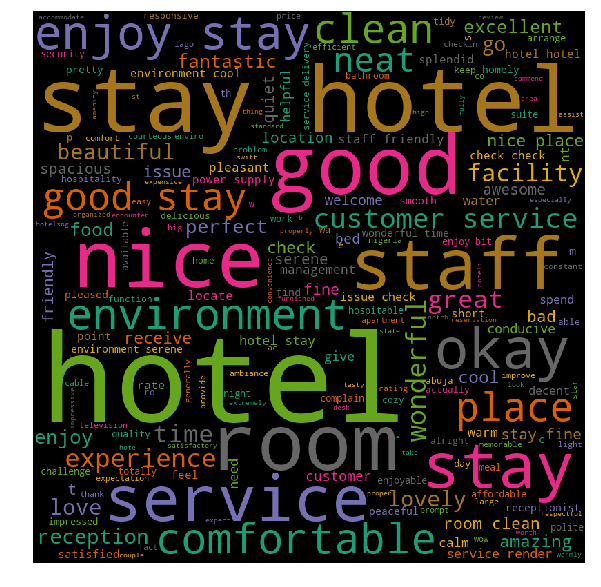

In [35]:
# a wordcloud of review texts from all the hotels
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['lemmatized'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This is the wordcloud generated from the pre-processed texts from reviews

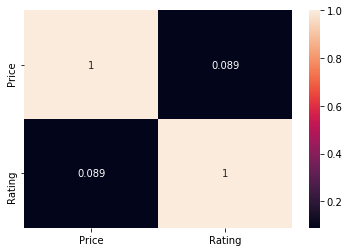

In [36]:
#visualising the price vs Rating on a heatmap
correl = combined_csv[['Price','Rating']]
correl.corr()
sns.heatmap(correl.corr(), annot = True)

This was to see if there was any correlation so to speak between prices of these hotels and the reviews left them by customers

In [37]:
#counting the occurence of the cities with hotels for the three states
combined_csv['City'].value_counts()

Ikeja                        101
Victoria Island               48
Lekki                         48
Surulere                      28
Wuse                          23
Yaba                          20
Garki                         17
Ikoyi                         17
Ajao Estate                   16
Lekki Phase 1                 16
Festac                        15
Maitama                       14
Gwarinpa                      12
Ajah                          11
Maryland                      11
Utako                          9
Kubwa                          8
Kaduna North                   8
Wuse 2                         8
Jabi                           8
Zaria                          6
Gbagada                        6
Magodo                         6
Central Business District      6
Apapa                          6
Egbeda                         5
Amuwo-Odofin                   5
Ikotun                         5
Abuja                          5
Kaduna South                   5
          

Wordcloud for the cities with hotels in them, using the three cities; Abuja, Lagos,Kaduna.

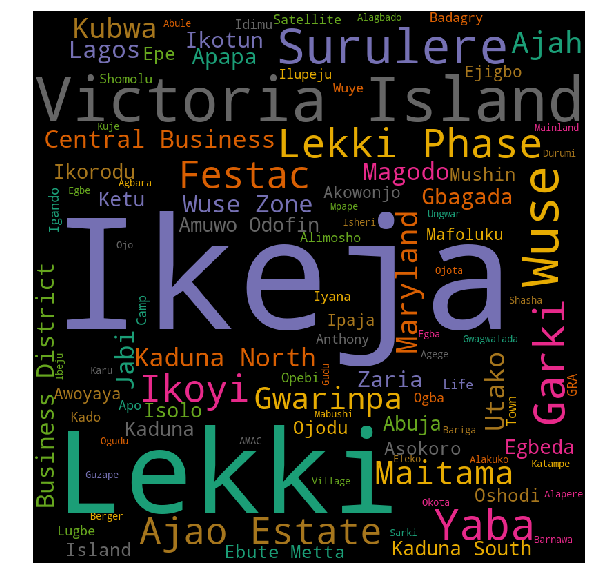

In [38]:
#wordcloud for the cities with hotels in them, using the three cities; Abuja, Lagos,Kaduna
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [39]:
#getting a count on the number of times a city appears
State_City = combined_csv.groupby(["State", "City"]).size().reset_index(name="Time")
State_City

,State,City,Time
0,Abuja,Kubwa,1
1,Abuja,Kuje,1
2,Abuja,Lugbe,1
3,Abuja,AMAC,1
4,Abuja,Abuja,5
5,Abuja,Apo,2
6,Abuja,Asokoro,4
7,Abuja,Central Business District,6
8,Abuja,Central Business District,1
9,Abuja,Durumi,1


A concatenation of the three csv files for the cities were performed, here, we aggregated for each State individually in other to get insights on a State-wise basis.

In [40]:
#aggregating Abuja from the combined_csv for the hotel cities in Abuja
Hotel_Cities_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

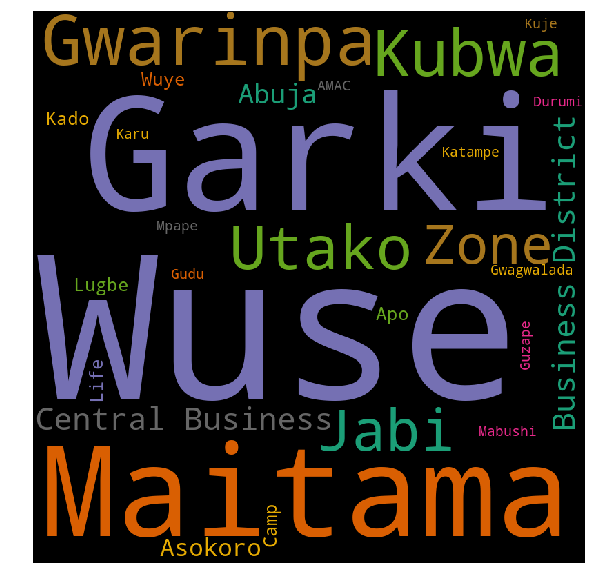

In [41]:
#wordcloud for the cities in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Abuja['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [42]:
#aggregating from the combined_csv for the hotel cities in Lagos
Hotel_Cities_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]

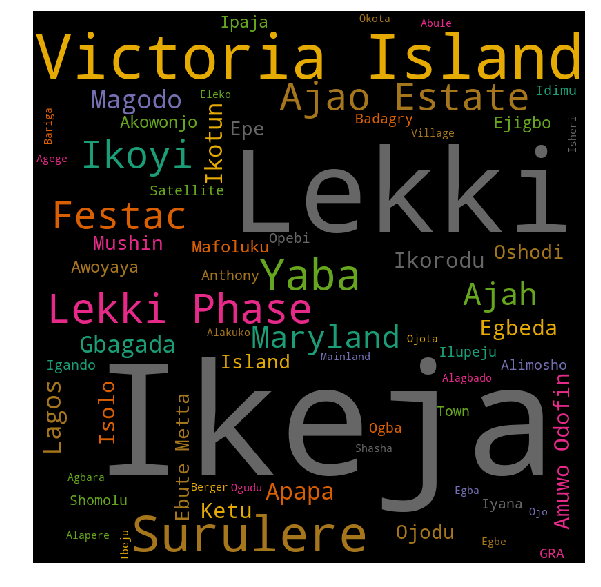

In [43]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Lagos['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [44]:
#aggregating from the combined_csv for the hotel cities in Kaduna
Hotel_Cities_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]

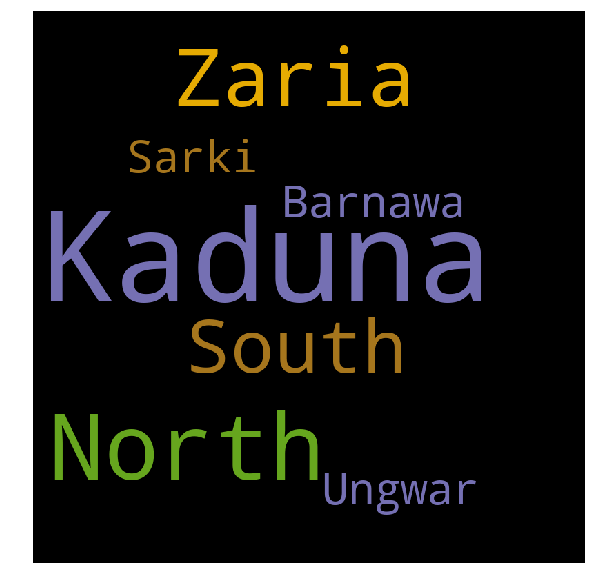

In [45]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Kaduna['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

A concatenation of the three csv files for the cities were performed. Here, we aggregated for each State individually in other to get insights from the Review_Text on a State-wise basis.

In [46]:
#aggregating Abuja from the combined_csv for the Review_text in Abuja
Review_Text_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

In [47]:
Review_Text_Abuja.head(4)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja,good stay my stay was very fine,good stay stay fine
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja,the room was reasonably tidy with a very big b...,room reasonably tidy big bed sleep comfortably...
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...",5000.0,7.0,Abuja,very clean room ventilation was not too good n...,clean room ventilation good ensuite facility c...
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja,the hotel is beautiful and fully equipped hosp...,hotel beautiful fully equip hospitable respons...


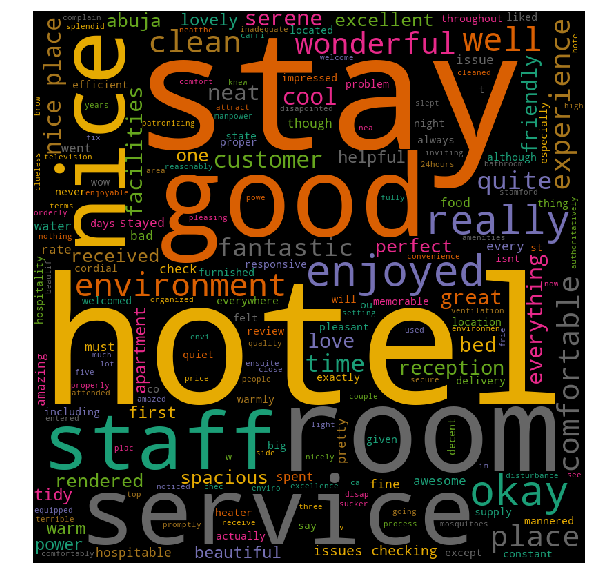

In [48]:
#wordcloud for the Review_text in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Abuja['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [49]:
#aggregating Lagos from the combined_csv for the Review_text in Lagos
Review_Text_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]
Review_Text_Lagos.head(2)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Ibis Lagos Airport,https://hotels.ng/hotel/26241-ibis-lagos-airpo...,"Ajao Estate, Lagos - 35/37 Murtala Mohamed Int...",https://hotels.ng/hotels-in-lagos/ajao-estate,Ajao Estate,My stay at the hotel was a pleasant one. The h...,20000.0,7.0,Lagos,my stay at the hotel was a pleasant one the ho...,stay hotel pleasant hotel neat comfortable foo...
1,Hotel Ibis Lagos Ikeja,https://hotels.ng/hotel/52497-hotel-ibis-lagos...,"Ikeja, Lagos - 23 Toyin Street, Ikeja, Lagos",https://hotels.ng/hotels-in-lagos/ikeja,Ikeja,"I had a good stay at the hotel, although it co...",28900.0,7.0,Lagos,i had a good stay at the hotel although it cou...,good stay hotel well hotel management


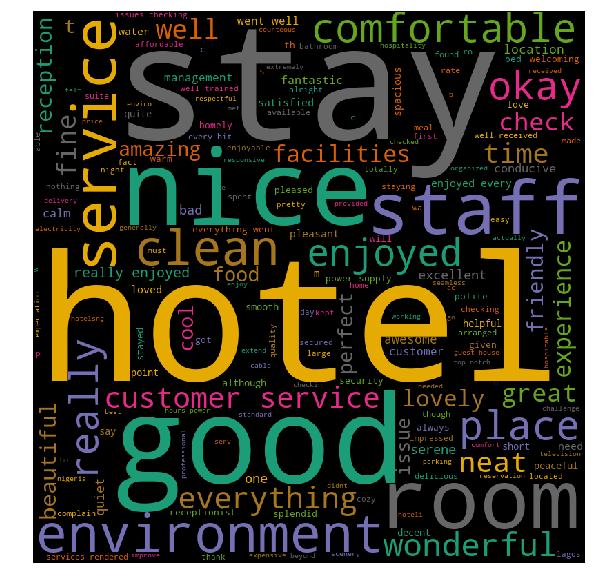

In [50]:
#wordcloud for the Review_text in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Lagos['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [51]:
#aggregating Kaduna from the combined_csv for the Review_text in Kaduna
Review_Text_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]
Review_Text_Kaduna.head(2)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Hotel Seventeen,https://hotels.ng/hotel/44141-hotel-17-kaduna,"Kaduna, Kaduna - 6 Tafawa Balewa Way Lafiya Road",https://hotels.ng/hotels-in-kaduna/kaduna,Kaduna,Nice stay but the hotel did not have a shoe sh...,18313.0,6.8,Kaduna,nice stay but the hotel did not have a shoe sh...,nice stay hotel shoe shiner
1,Epitome Hotels,https://hotels.ng/hotel/23912-epitome-hotels-s...,"Kaduna South, Kaduna - 12/13 Ethiopia Street.",https://hotels.ng/hotels-in-kaduna/kaduna-south,Kaduna South,"I enjoyed my stay, the environment was cool....",9000.0,6.9,Kaduna,i enjoyed my stay the environment was cool,enjoy stay environment cool


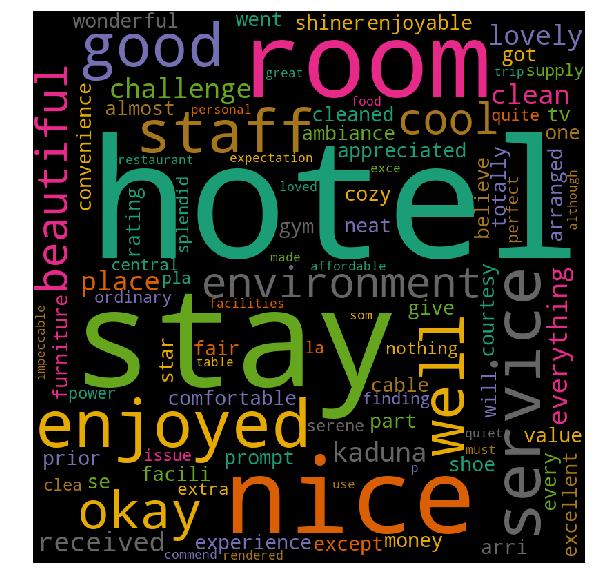

In [52]:
#wordcloud for the Review_text in Kaduna showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Kaduna['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()